In [51]:
experiment_label = 'LSVC01a_abs_scale'
user_label = 'tay_donovan'

## **Aim**

Look for performance improvement in Linear SVC model:
1. Absolute values for negative values
2. Use GradientSearch
3. Scale the features

## **Findings**

* First pass: {'C': 10000, 'degree': 3, 'gamma': 1e-10, 'kernel': 'rbf'}
* Second: {'C': 200000, 'degree': 3, 'gamma': 5e-11, 'kernel': 'rbf'}
* Third: {'C': 20000, 'degree': 3, 'gamma': 6e-06, 'kernel': 'rbf'}

In [64]:
#Initial imports
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath('..'))
from src.common_lib import DataReader, NBARawData

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score, accuracy_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report
from src.models.aj_metrics import confusion_matrix

from joblib import dump

# **Load Data**

In [68]:
#Load dataset using common function DataReader.read_data()
data_reader = DataReader()
# Load Raw Train Data
df_train = data_reader.read_data(NBARawData.TRAIN)
# Load Test Raw Data
df_test = data_reader.read_data(NBARawData.TEST)

### Data Cleansing and Feature Scaling

In [69]:
#For train dataframe, remove redundant column 'Id_old'
cols_drop = ["Id", "Id_old"]
df_train.drop(cols_drop, axis=1, inplace=True)
df_test.drop(cols_drop, axis=1, inplace=True)


# Convert negative-values to absolute numbers using common function
#print(df_train.where(df_train < 0).count())
negatives_strategy = 'abs'
df_train = data_reader.clean_negatives(negatives_strategy, df_train)
df_test = data_reader.clean_negatives(negatives_strategy, df_test)

In [37]:
# Comment Out Due to error
# Scale the features using common function by Standard Scaler
# df_train_scaled= data_reader.scale_features_by_standard_scaler(df_train)
# df_test_scaled= data_reader.scale_features_by_standard_scaler(df_test)
# df_train_scaled 

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,1.006533,0.640574,0.123403,0.113959,0.047090,0.177269,-0.983145,-0.988278,0.101298,0.655953,0.760387,0.070227,1.428377,-0.121037,0.266040,1.161949,1.107242,-0.238596,0.473210,0.446744
1,0.714265,0.360766,0.748626,0.822648,0.465578,1.704465,-0.265390,-0.102256,0.993652,1.087875,1.319370,-0.342956,3.210407,1.100107,1.608950,-0.681844,-0.364787,0.283247,0.196671,0.446744
2,1.298800,0.058574,-0.640758,-0.535673,-0.482994,-0.293888,0.093488,0.150893,0.950123,-1.071732,-1.076272,0.416147,-0.608229,-0.264701,-0.405415,-0.608092,-0.610125,-0.238596,-0.909485,0.446744
3,0.012823,0.058574,0.216029,0.409246,0.130788,1.282049,-0.265390,-0.355405,0.181102,-0.531830,-0.357579,-0.429436,-0.353653,-0.121037,-0.117649,0.129425,-0.610125,-0.369057,0.888019,0.446744
4,0.012823,-0.086926,-0.826009,-0.653788,-0.789885,1.005854,0.452365,0.404041,-0.544388,-1.287692,-1.156127,-1.668984,1.682952,0.381787,0.793612,-0.903099,-0.610125,0.283247,-0.771215,0.446744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.799235,-1.049465,-1.265980,-1.244362,-1.236272,-0.700057,-0.983145,-1.114852,0.137573,-1.071732,-1.076272,-0.544743,-0.990093,-0.264701,-0.645220,-0.829347,-0.855464,-0.238596,-1.186024,0.446744
7996,-0.513258,-1.407619,-1.265980,-1.244362,-1.347869,0.664672,-0.983145,-1.241426,-1.313409,-1.287692,-1.235982,-0.121951,-0.099078,-0.767525,-0.597259,-1.124354,-1.591478,-0.108136,-1.324294,0.446744
7997,1.298800,1.077074,0.794939,0.704533,0.772469,0.079788,-0.624268,-0.608554,0.173848,1.519796,1.558934,-0.160387,-0.099078,-0.049205,-0.069687,1.309452,1.352580,-0.238596,0.749749,0.446744
7998,-1.390061,-1.217350,-1.103885,-1.067190,-1.096776,-0.732551,-0.265390,-0.735129,-0.573408,-0.855771,-0.996417,0.281622,-0.862805,-1.126685,-1.124831,-1.050602,-0.855464,-0.108136,-1.047755,0.446744


In [70]:
# Split the training dataset using common function data_reader.splitdata
X_train, X_val, y_train, y_val  = data_reader.split_data(df_train)

## **Model Selection and Training**

In [71]:
# defining parameter range 
param_grid = {'C': [1e-1, 2.5e-1, 5e-1, 7.5e-1],'tol': [0.05,0.5,1]} 
  
grid = GridSearchCV(SVC(max_iter=20000,kernel='linear'), param_grid,scoring="f1", n_jobs=-2) 
  
# # fitting the model for grid search 
grid.fit(X_train, y_train) 

##Print the optimised parameters
print(grid.best_params_) 

{'C': 0.1, 'tol': 1}


In [72]:
#Create model with the optimised parameters
model = SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True,
                          max_iter=-1, random_state=23,tol=1, verbose=False)

model.fit(X_train, y_train);
#Store model in /models
dump(model, '../models/' + experiment_label + '.joblib')

['../models/LSVC01a_abs_scale.joblib']

### Model Prediction on Training Data and Exmine the Accuracy

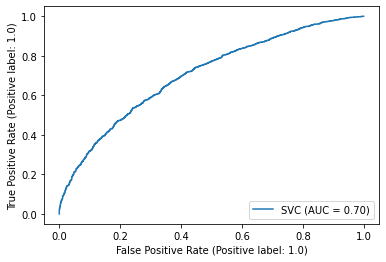

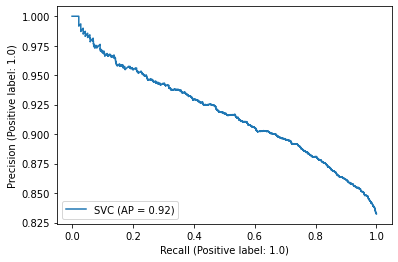

In [58]:
#Create predictions for train and validation
y_train_preds = model.predict(X_train)

plot_roc_curve(model, X_train, y_train)
#Precision Recall Curve
plot_precision_recall_curve(model,X_train,y_train)
#Confusion matrix
confusion_matrix(y_train, y_train_preds)

## **Other Performance Measures**

In [55]:
#Training performance results
print("ROC AUC Score:", roc_auc_score(y_train,y_train_preds))

print("Accuracy Score:", accuracy_score(y_train, y_train_preds))

print(classification_report(y_train, y_train_preds)) 

ROC AUC Score: 0.6468148242940188
Accuracy Score: 0.63671875
              precision    recall  f1-score   support

         0.0       0.27      0.66      0.38      1074
         1.0       0.90      0.63      0.74      5326

    accuracy                           0.64      6400
   macro avg       0.58      0.65      0.56      6400
weighted avg       0.80      0.64      0.68      6400



### Model Testing on Validation Data

,pred:0.0,pred:1.0
true:0.0,175,82
true:1.0,508,835


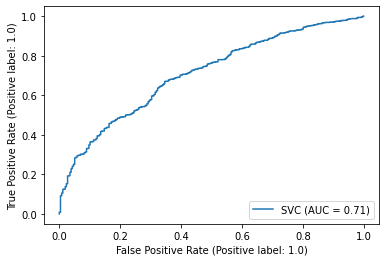

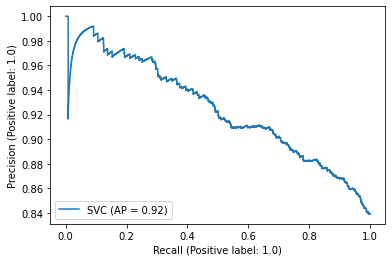

In [59]:
y_val_preds = model.predict(X_val)

plot_roc_curve(model, X_val, y_val)
#Precision Recall Curve
plot_precision_recall_curve(model,X_val,y_val)
#Confusion matrix
confusion_matrix(y_val, y_val_preds)

In [61]:
#Validation performance analysis
print("ROC AUC Score:",roc_auc_score(y_val,y_val_preds))
print("Accuracy Score:", accuracy_score(y_val, y_val_preds))
print(classification_report(y_val, y_val_preds)) 

ROC AUC Score: 0.6513381099866435
Accuracy Score: 0.63125
              precision    recall  f1-score   support

         0.0       0.26      0.68      0.37       257
         1.0       0.91      0.62      0.74      1343

    accuracy                           0.63      1600
   macro avg       0.58      0.65      0.56      1600
weighted avg       0.81      0.63      0.68      1600



### Prediction on Test Data

In [80]:
# predictions
y_test_preds = model.predict_proba(df_test)[:,1]

output = pd.DataFrame({'Id': range(0,3799), 'TARGET_5Yrs': [p for p in y_test_preds]})

output.to_csv("../reports/" + user_label + "_submission_" + experiment_label + ".csv", index=False)

After outputting the predictions into kaggle, the final score was 0.70723

## **Feature Correlation and Selection** Shall we remove? Not found in the Model building

<AxesSubplot:>

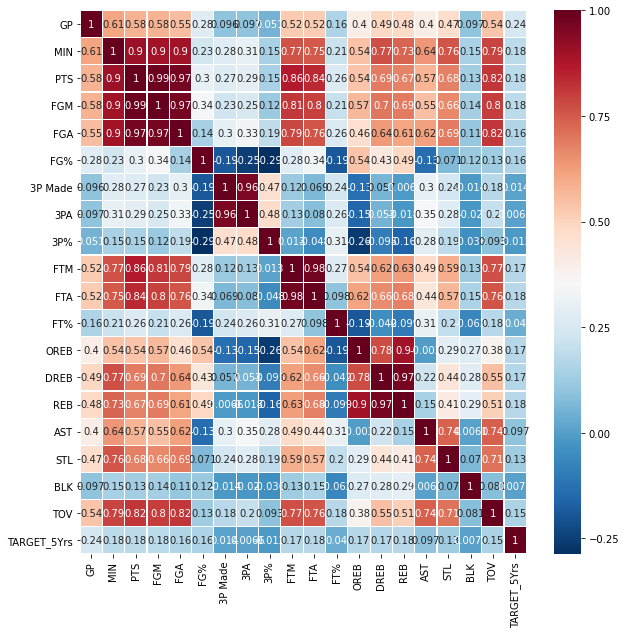

In [10]:
#Use Pearson Correlation to determine feature correlation 
pearsoncorr = df_train.corr('pearson')

#Create heatmap of pearson correlation factors
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.2)